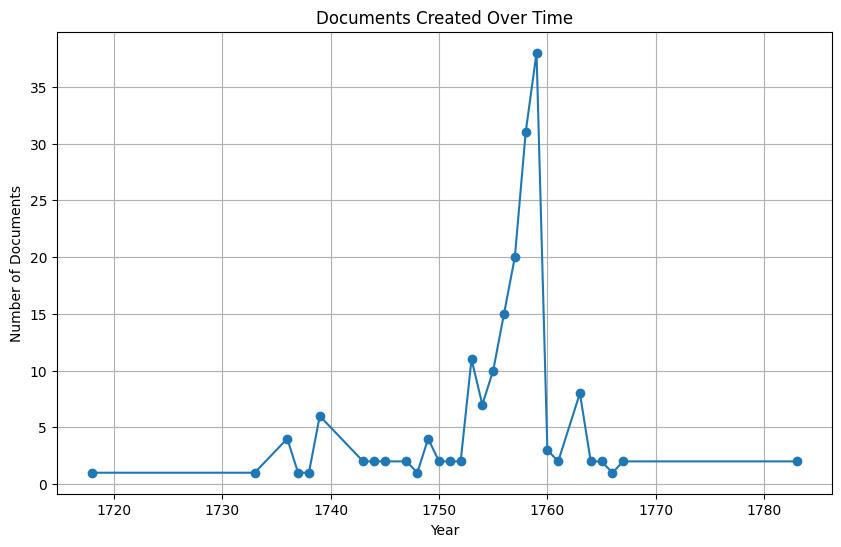

In [ ]:
df['Execution Date'] = pd.to_datetime(df['Execution Date'], errors='coerce')

df['Year'] = df['Execution Date'].dt.year
document_yearly = df.groupby('Year').size()

plt.figure(figsize=(10, 6))
document_yearly.plot(kind='line', marker='o')
plt.title('Documents Created Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.grid(True)
plt.show()


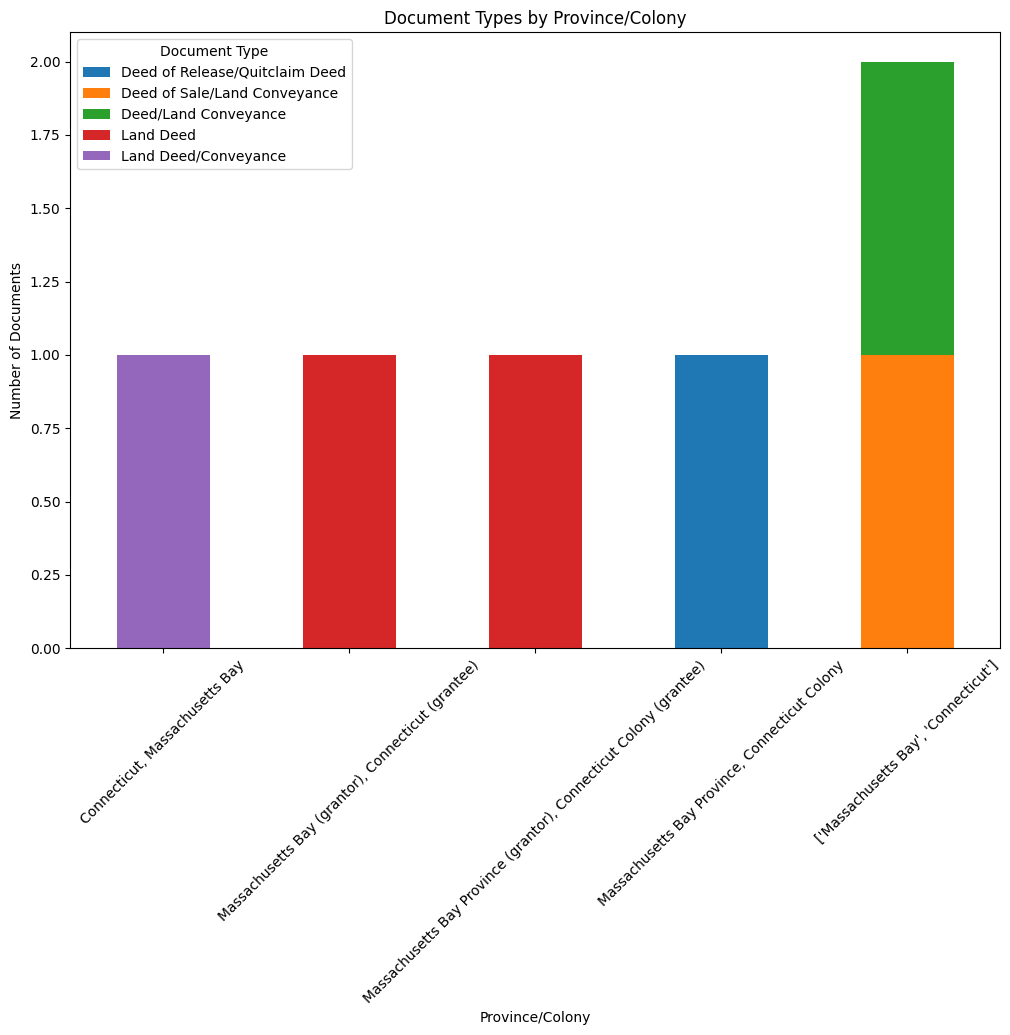

In [ ]:
pivot_df = df.pivot_table(index='Province/Colony', columns='Document Type', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Document Types by Province/Colony')
plt.xlabel('Province/Colony')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.show()


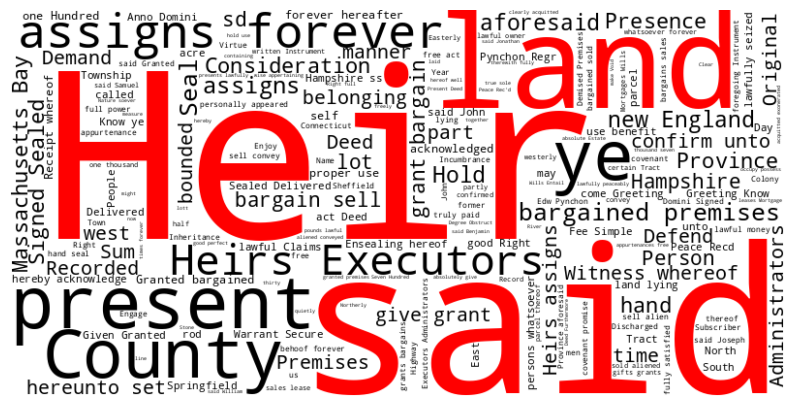

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
file_path = 'land_deeds_data_.csv' 
df = pd.read_csv(file_path)
if 'Document Text' in df.columns:

    text = " ".join(df['Document Text'].dropna().astype(str))

    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if font_size > 100: 
            return "red"
        else:
            return "black"
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          color_func=color_func).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("The 'Document Text' column is not found in the DataFrame.")


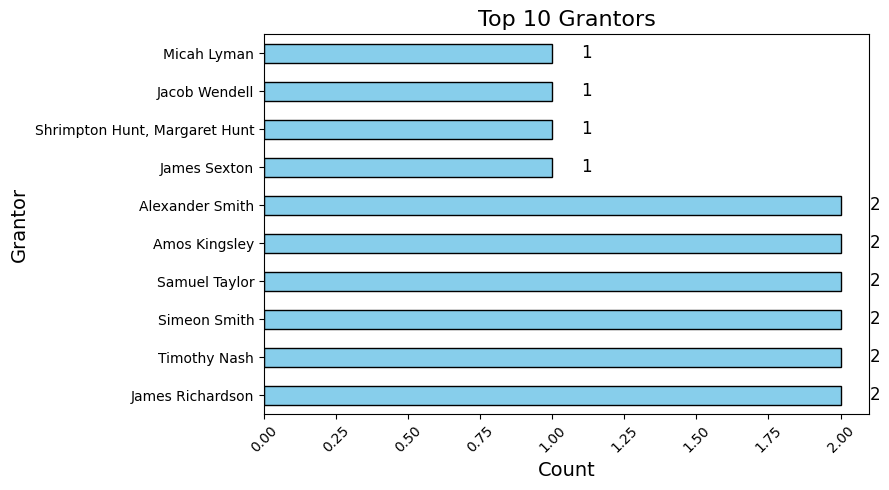

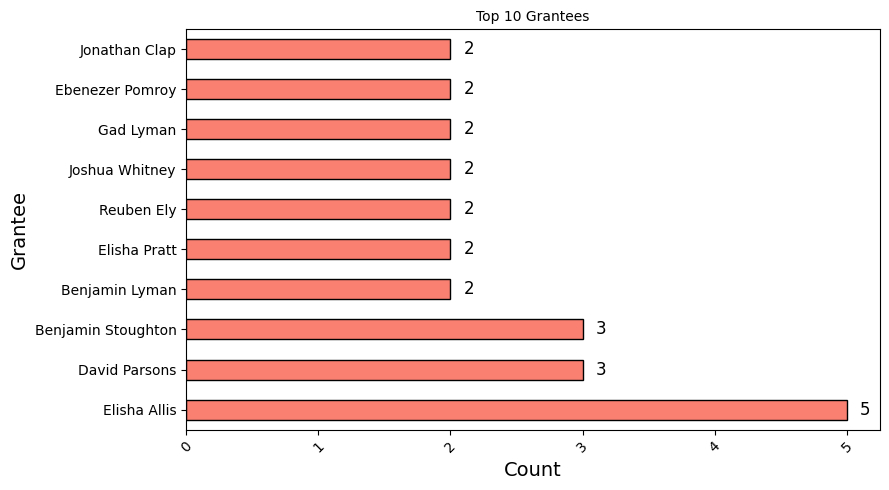

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('standardized_land_deeds.csv')
top_grantors = df['Grantors'].value_counts().head(10)
plt.figure(figsize=(9, 5))
top_grantors.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Grantors', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Grantor', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(top_grantors):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=12)
plt.tight_layout()
plt.show()


top_grantees = df['Grantees'].value_counts().head(10)

plt.figure(figsize=(9, 5))
top_grantees.plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Top 10 Grantees', fontsize=10)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Grantee', fontsize=14)
plt.xticks(rotation=45)
for index, value in enumerate(top_grantees):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=12)
plt.tight_layout()
plt.show()
